# Autoencoder

## PCA: Linear Dimension Reduction
Imagine that we want to visualize our data, say images, to check the distribution. How can we do? We cannot visualize these data directly since the human can visualize at most 3-dimensional objects, while images are high-dimensional. If we want to reduce the compoenents of a vector, one can **multiply a matrix** to project it to a low-dimensional space. This is **linear** dimensionality reduction. Meanwhile, we want to preserve the variance of data in low-dimensional space for the purpose of visualization.

Given a dataset $\{x_1,...,x_N\},x_i\in\mathbb{R}^M$ and we want to project it to a $m$-dimensional space. **What is the best way to project our data?**

### Idea of PCA
The goal of PCA is to rotate the "axis" in the original space so that
1. principle axis 1 has the highest variance, axis 2 has the next highest variance,..., and axis $M$ has the lowest variance.
2. the covariance among each pair of the principal axes is zero.

Recall that in linear algebra, **rotating axis** means applying **linear transformation** on the basis of the vector space, and a **linear transformation** is actually (isomorphic to) a **matrix**. Hence, what we do is to find a matrix that satisfies the above conditions.

### Derivation
We first consider the covariance matrix of our data. Let $\mu=\frac{1}{N}\sum_{i=1}^N x_i$ be the mean and $\Sigma=\frac{1}{N}\sum_{i=1}^N(x_i-\mu)(x_i-\mu)^T$ be the covariance matrix. Since the covariance matrix is symmetric, one can have orthonormal decomposition
$$
\Sigma=U\Lambda U^T
$$
with $U$ orthonormal. Also, a covariance matrix is positive semidefinite, by ordering,
$$
\lambda_1\geq\lambda_2\geq...\geq\lambda_M\geq 0.
$$
with corresponding orthonormal eigenvectors $u_1,...,u_M$. The map point of $x\in\mathbb{R}^M$ has $m$ principle components, $m\leq M$, where the $i$-th principle component is $u_i^T x$.

Now we verify that this method satisfies 1. and 2. Consider the covariance of the $k$-th and $\ell$-th principle components $x_1,...,x_N$
$$
\begin{aligned}
& \frac{1}{N}\sum_{i=1}^N [u^T_k(x_i-\mu)][u^T_{\ell}(x_i-\mu)]^T=\frac{1}{N}\sum_{i=1}^N u^T_k(x_i-\mu)(x_i-\mu)^T u_{\ell} \\
& u^T_k\Sigma u_{\ell} = u^T_k U\Lambda U^T u_{\ell}  = e^T_k\Lambda e_{\ell}=
\begin{cases}
\lambda_k, & k=\ell \\
0, & k\neq\ell.
\end{cases}
\end{aligned}
$$
Since $\lambda_1\geq\lambda_2\geq...\geq\lambda_M\geq 0$, we verify that
1. principle axis 1 has the highest variance, axis 2 has the next highest variance,..., and axis $M$ has the lowest variance.
2. the covariance among each pair of the principal axes is zero.

### Visualization
We have 2-dimensional data of 2 features and we want to find two principle axes, i.e. $m=M=2$.

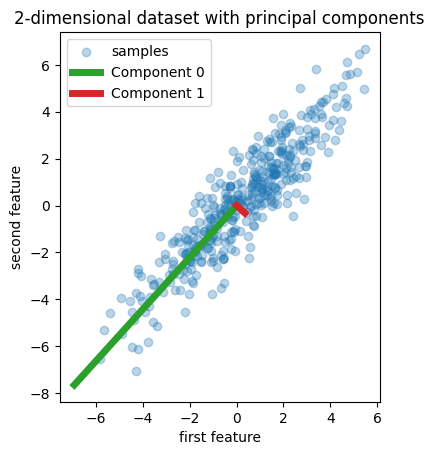

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 400
cov = [[5, 5], [5, 6]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

### Error Analysis of PCA
Now we investigate whether PCA is the "best" linear dimension reduction, i.e. the projection $\hat{x}^{PCA}$ minimizes the norm $\|x-\hat{x}^{PCA}\|$.

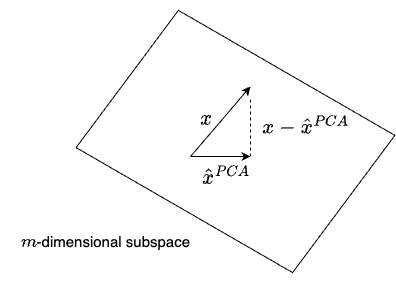

Let $\hat{x}^S$ be the projection of $x$ on any $m$-dimensional subspace. WLOG, assume zero mean $\mu=\frac{1}{N}\sum_{i=1}^N x_i=0$. By SVD,
$$
X=[x_1,...,x_N]=UDV^T\in\mathbb{R}^{M\times N}.
$$
Also,
$$
\Sigma=\frac{1}{N}\sum_{i=1}^N (x_i-\mu)(x_i-\mu)^T=\frac{1}{N}XX^T=\frac{1}{N}UDV^TVD^TU^T=U\left(\frac{1}{N}DD^T\right)U^T
$$
where
$$
\frac{1}{N}DD^T=diag\left(\frac{\sigma_1^2}{N},...,\frac{\sigma_{min\{M,N\}}^2}{N},0,...,0\right), |\sigma_1|\geq|\sigma_2|\geq...
$$
Then, $\hat{x}^{PCA}_n$ is given by $\sum_{i=1}^m u_iu_i^T x_n$ and the projected data matrix $\hat{X}^{PCA}=\sum_{i=1}^m u_iu_i^T X=\sum_{i=1}^m u_iu_i^T UDV^T=\sum_{i=1}^m \sigma_i u_iv_i^T$.

**Theorem (Low Rank Approximation)**
Let $m\leq n, A\in\mathbb{R}^{m\times n}$ be a matrix with SVD $A=U\Sigma V^T$ where $U,V$ are unitary and $\Sigma=diag(\sigma_1,...,\sigma_m)$ with $|\sigma_1|\geq|\sigma_2|\geq...\geq|\sigma_m|$. Let $k\leq m$. Then both low rank approximation problems
$$
\begin{aligned}
& \min_{A_k\in\mathbb{R}^{m\times n}} \|A-A_k\|_2,\quad rank(A_k)\leq k \\
& \min_{A_k\in\mathbb{R}^{m\times n}} \|A-A_k\|_F,\quad rank(A_k)\leq k
\end{aligned}
$$
have optimal solution $A_k=\sum_{i=1}^k\sigma_i u_iv_i^T$, $u_i,v_i$ the $i$-th column of $U,V$.

With low rank approximation theorem, one has
$$
\|X-\hat{X}^{PCA}\|\leq\|X-\hat{X}^S\|
$$
where $\hat{X}^S$ denotes the projection on any $m$-dimensional space. That is,
$$
\sum_{i=1}^m \|x_i-\hat{x_i}^{PCA}\|\leq\sum_{i=1}^m \|x_i-\hat{x_i}^{S}\|.
$$

### Relation with Neural Network
With PCA, one has minimum mean square error $\sum_{i=1}^m\|x_i-\hat{x_i}^{PCA}\|$, thus,
$$
\sum_{i=1}^m \|\hat{x_i}^{PCA}\|\geq\sum_{i=1}^m\|\hat{x_i}^S\|.
$$
We could rewrite our optimization problem as below
$$
\begin{aligned}
& maximize\quad Tr(\Phi^T\Sigma\Phi) \\
& subject\text{ }to\quad \Phi^T\Phi=I_m \\
& variables\quad \Phi=[\phi_1,...,\phi_m].
\end{aligned}
$$
$$
\begin{aligned}
Tr(\Phi^T\Sigma\Phi) &= \frac{1}{N}Tr(\Phi^T XX^T \Phi)=\frac{1}{N}\|\Phi^T X\|^2_F=\frac{1}{N} \sum_{i=1}^N \|\Phi^T x_i\|^2_F \\
& =\frac{1}{N} \sum_{i=1}^N \|\hat{x}^S\|^2_F\leq\frac{1}{N} \sum_{i=1}^N \|\hat{x}^{PCA}\|^2_F.
\end{aligned}
$$
One may observe that the matrix $\Phi^T$ can be replaced by a single linear neural network `nn.Linear` in PyTorch systax. Can we use multiple nonlinear neural networks with nonlinear activations? Yes, we can. The nonlinear generalization of PCA is the **autoencoder**.

## Autoencoder: Non-linear generalization of PCA
The structure of the auencoder generally consists of an encoder and a decoder.
- Encoder $E(x)$: a neural network with multiple layers that maps high-dimensional data $x$ to a low-dimensional latent vector $z$.
- Decoder $D(z)$: a neural network with multiple layers that reconstruct the latent code.

The goal of autoencoder is straighforward: we want to minimize the mean square error of the input $x$ and the output $\hat{x}$. There are lots of variation of autoencoder, but they will not be included here.

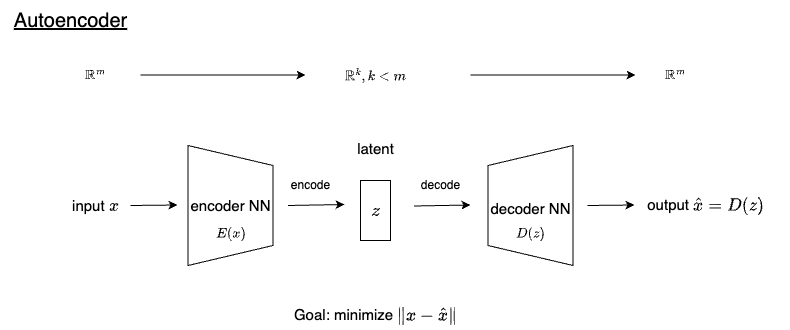

## Embedding and Clustering Implementation with MNIST

In [ ]:
import random
import math
import itertools
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils import data
from torchvision import datasets

In [ ]:
def same_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    random.seed(seed)
    np.random.seed(seed)

device = 'cpu'
same_seed(2023)

### Hyperparameter
`reduce_dim=2` means we want to embed our data to $\mathbb{R}^2$.

In [ ]:
n_epoch = 15
batch_size = 32
latent_dim = 32
reduce_dim = 2
n_iter = 1000
lr = 0.0005
model_save = 'model.pth'

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,)),
])

In [ ]:
train_set = datasets.MNIST(root='./', train=True,download=True, transform=transform)

test_set = datasets.MNIST(root='./', train=False,download=True, transform=transform)

train_size = int(0.9 * len(train_set))
val_size = len(train_set) - train_size

train_set, val_set = torch.utils.data.random_split(dataset=train_set, lengths=[train_size, val_size])

train_loader = data.DataLoader(train_set, batch_size=batch_size,shuffle=True)
valid_loader = data.DataLoader(dataset=val_set,batch_size=batch_size,shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=batch_size,shuffle=False)

### Autoencoder
The output of the model is the laten vectors and the reconstructed images.

In [ ]:
class autoencoder(nn.Module):
    def __init__(self,latent_dim):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,16,3,1,1),
            nn.MaxPool2d(2,2), #[14,14]
            nn.Conv2d(16,latent_dim,3,1,1),
            nn.MaxPool2d(2,2), #[7,7]
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 16, 2, stride=2), # [14,14]
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 2, stride=2), # [28,28]
            nn.Sigmoid(),
        )
    def forward(self,x):
        latent = self.encoder(x)
        reconstruct = self.decoder(latent)

        return latent,reconstruct

In [ ]:
model = autoencoder(latent_dim=latent_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=lr,weight_decay=1e-5)

### Training and Validation

In [ ]:
def Train(train, val, model, device, n_epoch, batch, model_save):
    best_loss = 100
    for epoch in range(n_epoch):
        total_loss = 0

        # Training
        model.train()
        train_loss = []
        idx = 0
        for image, _ in train:
            image = image.to(device, dtype=torch.float)
            _, reconsturct = model(image)
            loss = criterion(reconsturct, image)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

            print('[Epoch %d | %d/%d] loss: %.4f' %
                 ((epoch+1), idx*batch, len(train)*batch, loss.item()), end='\r')
            idx += 1
        total_loss = sum(train_loss)/len(train)
        print("\n  Training loss:%.4f " % total_loss)

        # Validation
        model.eval()
        valid_loss = []
        with torch.no_grad():
            for image, _ in val:
                image = image.to(device, dtype=torch.float)
                _, reconstruct = model(image)

                loss = criterion(reconstruct, image)
                valid_loss.append(loss.item())
            total_loss = sum(valid_loss)/len(val)
            print(" Validation loss:%.4f " % total_loss)
        # save model
        if total_loss < best_loss:
                best_loss = total_loss
                print("saving model with loss %.4f...\n" % total_loss)
                torch.save(model.state_dict(), "%s" % model_save)

In [ ]:
Train(train_loader, valid_loader, model, device, n_epoch, batch_size, model_save)

[Epoch 1 | 53984/54016] loss: 0.5140
  Training loss:0.5162 
 Validation loss:0.4772 
saving model with loss 0.4772...

[Epoch 2 | 53984/54016] loss: 0.4730
  Training loss:0.4754 
 Validation loss:0.4722 
saving model with loss 0.4722...

[Epoch 3 | 53984/54016] loss: 0.5021
  Training loss:0.4723 
 Validation loss:0.4705 
saving model with loss 0.4705...

[Epoch 4 | 53984/54016] loss: 0.4264
  Training loss:0.4710 
 Validation loss:0.4695 
saving model with loss 0.4695...

[Epoch 5 | 53984/54016] loss: 0.4939
  Training loss:0.4702 
 Validation loss:0.4688 
saving model with loss 0.4688...

[Epoch 6 | 53984/54016] loss: 0.4402
  Training loss:0.4697 
 Validation loss:0.4682 
saving model with loss 0.4682...

[Epoch 7 | 53984/54016] loss: 0.4582
  Training loss:0.4693 
 Validation loss:0.4679 
saving model with loss 0.4679...

[Epoch 8 | 53984/54016] loss: 0.4562
  Training loss:0.4689 
 Validation loss:0.4675 
saving model with loss 0.4675...

[Epoch 9 | 53984/54016] loss: 0.4865
  T

### Plot the Reconstructed Images

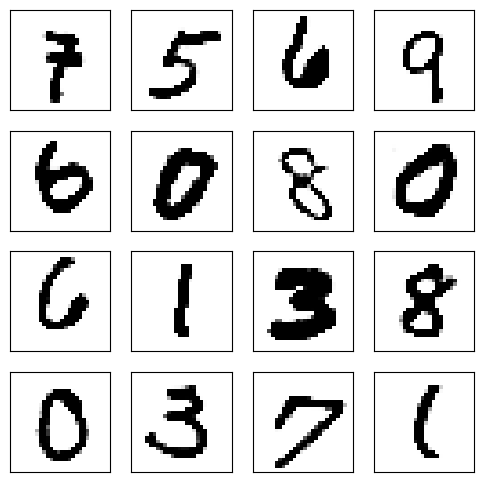

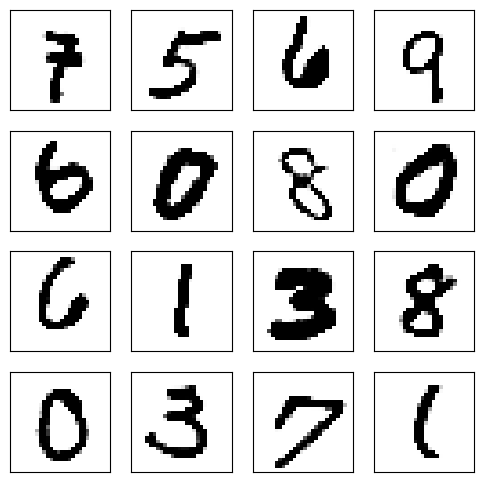

In [ ]:
fixed_number_samples = 16

size_figure_grid = int(math.sqrt(fixed_number_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)

model.load_state_dict(torch.load(model_save))
model.eval()

for batch_idx, samples in enumerate(train_loader):
    if batch_idx==0:
        img, _ = samples
    _, reconstruct = model(img)
    for k in range(fixed_number_samples):
        i = k//4
        j = k%4
        ax[i,j].cla()
        ax[i,j].imshow(reconstruct[k,:].data.cpu().numpy().reshape(28, 28), cmap='Greys')
    display.clear_output(wait=True)
    display.display(plt.gcf())


### Clustering Process

In [ ]:
def clustering(model, device, loader, n_iter, reduced_method, reduced_dim, perplexity):
    assert reduced_method in ['pca', 'tsne', None]

    model.eval()
    latent_vector = torch.tensor([]).to(device, dtype=torch.float)
    for image, _ in loader:
        image = image.to(device, dtype=torch.float)
        latent, _ = model(image)
        latent_vector = torch.cat((latent_vector, latent), dim=0)

    latent_vector = latent_vector.cpu().detach().numpy()

    if reduced_method == 'tsne':
        tsne = TSNE(n_components=reduced_dim, verbose=1, method='exact', perplexity=perplexity, n_iter=n_iter)
        latent_vector = latent_vector.reshape(batch_size,-1)
        latent_vector = tsne.fit_transform(latent_vector)
    elif reduced_method == 'pca':
        pca = PCA(n_components=reduced_dim, copy=False, whiten=True, svd_solver='full')
        latent_vector = latent_vector.reshape(batch_size,-1)
        latent_vector = pca.fit_transform(latent_vector)

    kmeans = KMeans(n_clusters=2, random_state=0, max_iter=n_iter).fit(latent_vector)
    return latent_vector,kmeans.labels_

In [ ]:
model.load_state_dict(torch.load(model_save))
predicted_tsne = clustering(model, device, test_loader, n_iter, reduced_method='tsne', reduced_dim=reduce_dim, perplexity=10)
predicted_pca = clustering(model, device, test_loader, n_iter, reduced_method='pca', reduced_dim=reduce_dim, perplexity=10)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 420.963478
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.349010
[t-SNE] KL divergence after 1000 iterations: 0.079663


/Users/lerong/miniconda3/envs/general_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lerong/miniconda3/envs/general_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Plot the Results
The blue points are the embedded points from t-SNE, where the top left points are labeled 1, and the bottom right points are labeled 0. On the other hand, the orange points are the embedded points from PCA. The distribution of embedded points illustrate the comparison of these two embedding scheme. T-SNE, at least in this scenario, is better than PCA.

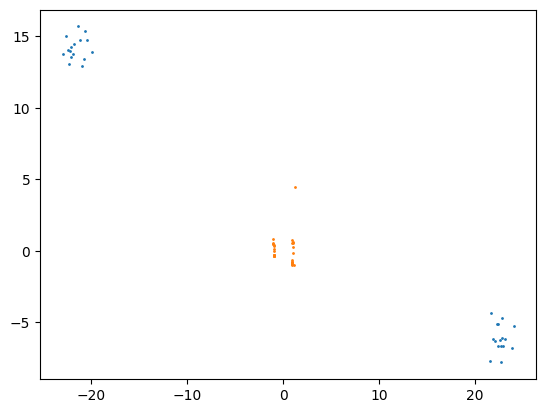

In [ ]:
# Blue: t-SNE, Orange: PCA
plt.scatter(x=predicted_tsne[0][:,0],y=predicted_tsne[0][:,1],s=1)
plt.scatter(x=predicted_pca[0][:,0],y=predicted_pca[0][:,1],s=1)

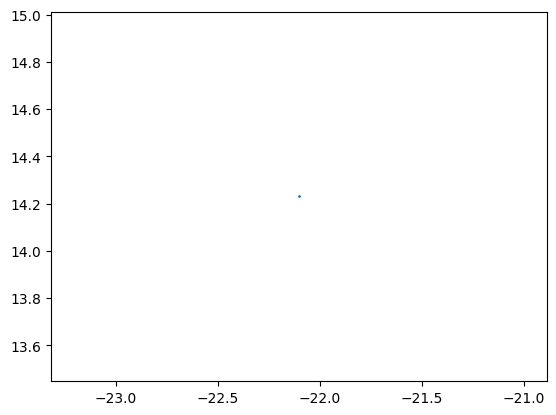

In [ ]:
plt.scatter(x=predicted_tsne[0][0,0],y=predicted_tsne[0][0,1],s=1)

In [ ]:
predicted_tsne[1]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [ ]:
predicted_pca[1]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

## References
- [1] Reducing the Dimensionality of Data with Neural Networks, https://www.science.org/doi/10.1126/science.1127647
- [2] Principal Component Regression vs Partial Least Squares Regression, https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
- [3] From Autoencoder to Beta-VAE, https://lilianweng.github.io/posts/2018-08-12-vae/